In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime

In [44]:
victimas = pd.read_excel(r'C:\Users\Usuario\Desktop\HENRY\PI2\homicidios.xlsx',sheet_name = 'VICTIMAS')
victimas

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01 00:00:00
1,2016-0002,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02 00:00:00
2,2016-0003,2016-01-03,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30,2016-01-03 00:00:00
3,2016-0004,2016-01-10,2016,1,10,CONDUCTOR,MOTO,MASCULINO,18,SD
4,2016-0005,2016-01-21,2016,1,21,CONDUCTOR,MOTO,MASCULINO,29,2016-02-01 00:00:00
...,...,...,...,...,...,...,...,...,...,...
712,2021-0092,2021-12-12,2021,12,12,PEATON,PEATON,FEMENINO,50,2021-12-12 00:00:00
713,2021-0093,2021-12-13,2021,12,13,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,18,2021-12-18 00:00:00
714,2021-0094,2021-12-20,2021,12,20,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,43,2021-12-20 00:00:00
715,2021-0095,2021-12-30,2021,12,30,CONDUCTOR,MOTO,MASCULINO,27,2022-01-02 00:00:00


In [45]:
victimas.shape

(717, 10)

In [46]:
victimas.duplicated().sum()

0

In [47]:
victimas.isna().sum()

ID_hecho               0
FECHA                  0
AAAA                   0
MM                     0
DD                     0
ROL                    0
VICTIMA                0
SEXO                   0
EDAD                   0
FECHA_FALLECIMIENTO    0
dtype: int64

In [48]:
victimas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID_hecho             717 non-null    object        
 1   FECHA                717 non-null    datetime64[ns]
 2   AAAA                 717 non-null    int64         
 3   MM                   717 non-null    int64         
 4   DD                   717 non-null    int64         
 5   ROL                  717 non-null    object        
 6   VICTIMA              717 non-null    object        
 7   SEXO                 717 non-null    object        
 8   EDAD                 717 non-null    object        
 9   FECHA_FALLECIMIENTO  717 non-null    object        
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 56.1+ KB


Pasamos a mayuscula la primer letra de los nombres de todos los campos y se cambian las siglas por los nombres para una mejor lectura.

In [49]:
# Se coloca la primera en mayúscula
victimas.columns = [x.capitalize() for x in victimas.columns]
# Se reemplazan los guiones por espacios
victimas.columns = victimas.columns.str.replace('_', ' ')
# Se renombran algunas columnas
victimas =victimas.rename(columns={'Id hecho': 'Id',
                                                      'Aaaa':'Año',
                                                      'Mm':'Mes',
                                                      'Dd':'Día',
                                                      'Victima':'Víctima'})

In [50]:
victimas['Edad'].unique()

array([19, 70, 30, 18, 29, 22, 16, 59, 65, 34, 41, 50, 38, 21, 52, 36, 20,
       54, 'SD', 56, 24, 78, 79, 26, 57, 37, 58, 23, 60, 42, 53, 51, 40,
       87, 76, 75, 35, 80, 43, 45, 67, 27, 55, 49, 81, 25, 33, 46, 83, 39,
       28, 7, 48, 4, 82, 32, 17, 47, 61, 10, 95, 73, 84, 66, 85, 1, 15,
       13, 77, 44, 31, 62, 74, 71, 11, 86, 69, 72, 12, 63, 92, 68, 91, 64,
       5, 88], dtype=object)

In [51]:
#convierto SD a Nan y luego a float para poder obtener medidas de estadísticas (max, media, etc)
victimas['Edad'] = victimas['Edad'].replace('SD', np.nan)
victimas['Edad'] = victimas['Edad'].astype(float)


In [52]:
victimas.describe()

,Año,Mes,Día,Edad
count,717.000000,717.000000,717.000000,664.000000
mean,2018.174338,6.688982,15.960948,42.167169
std,1.672655,3.575140,8.683358,19.788034
min,2016.000000,1.000000,1.000000,1.000000
25%,2017.000000,4.000000,9.000000,27.000000
50%,2018.000000,7.000000,16.000000,37.000000
75%,2019.000000,10.000000,23.000000,56.250000
max,2021.000000,12.000000,31.000000,95.000000


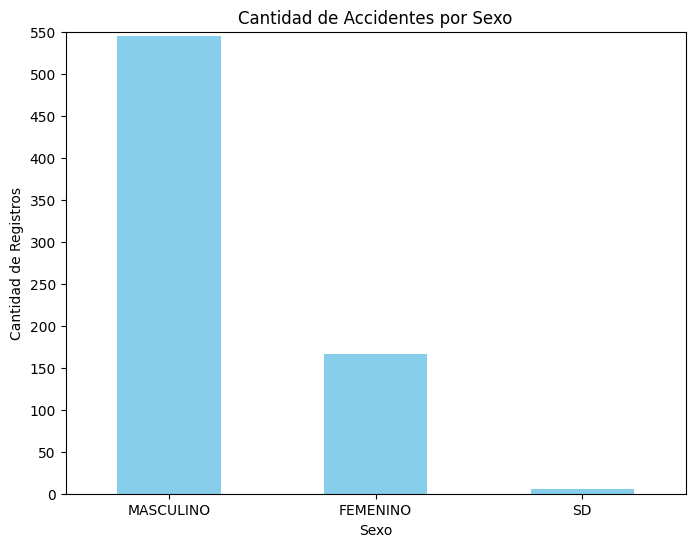

In [53]:
#comenzamos el EDA analizando cantidad de accidentes por sexo
conteo_sexo = victimas['Sexo'].value_counts()

# Gráfico de barras
plt.figure(figsize=(8, 6))  # Tamaño de la figura
conteo_sexo.plot(kind='bar', color='skyblue')  # Crear el gráfico de barras
plt.title('Cantidad de Accidentes por Sexo')  # Título del gráfico
plt.xlabel('Sexo')  # Etiqueta del eje x
plt.ylabel('Cantidad de Registros')  # Etiqueta del eje y
plt.xticks(rotation=0)  # Rotación de las etiquetas del eje x
max_count = conteo_sexo.max()
ylim_max = (int(max_count / 50) + 1) * 50
plt.ylim(0, ylim_max)

# Agregar marcas en el eje y cada 50 unidades
plt.yticks(np.arange(0, ylim_max + 1, 50))
plt.show()  # Mostrar el gráfico

Como en el grafico anterior, gran parte corresponde a MASCULINO, analizaré este sector.

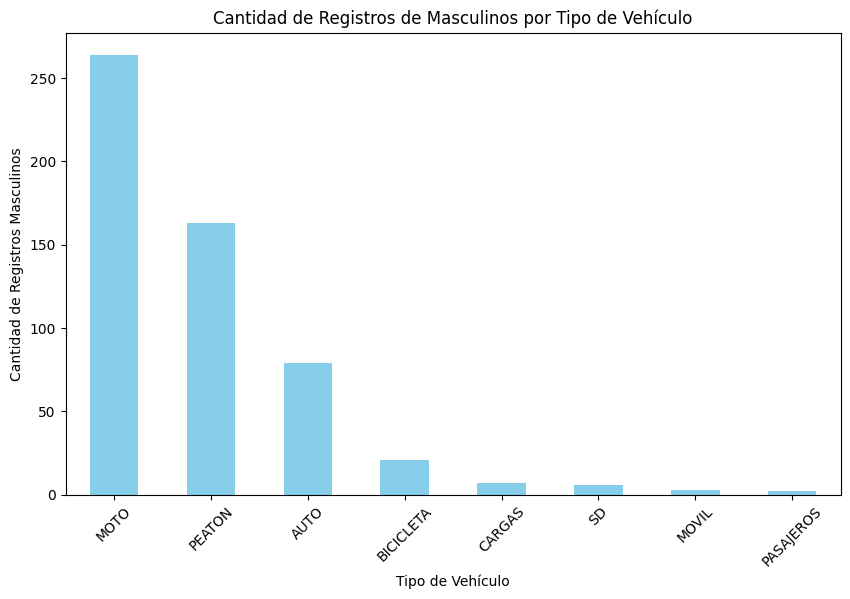

In [54]:
# Filtrar los registros con género "MASCULINO"
masculino_df = victimas[victimas['Sexo'] == 'MASCULINO']

# Contar la cantidad de registros masculinos por tipo de vehículo
conteo_masculino_por_vehiculo = masculino_df['Víctima'].value_counts()

# Crear el gráfico de barras agrupadas
plt.figure(figsize=(10, 6))  # Tamaño de la figura
conteo_masculino_por_vehiculo.plot(kind='bar', color='skyblue')  # Crear el gráfico de barras
plt.title('Cantidad de Registros de Masculinos por Tipo de Vehículo')  # Título del gráfico
plt.xlabel('Tipo de Vehículo')  # Etiqueta del eje x
plt.ylabel('Cantidad de Registros Masculinos')  # Etiqueta del eje y
plt.xticks(rotation=45)  # Rotación de las etiquetas del eje x
plt.show()  # Mostrar el gráfico

Podemos decir que casi la mitad de los accidentes de victimas masculinas se dieron en moto.

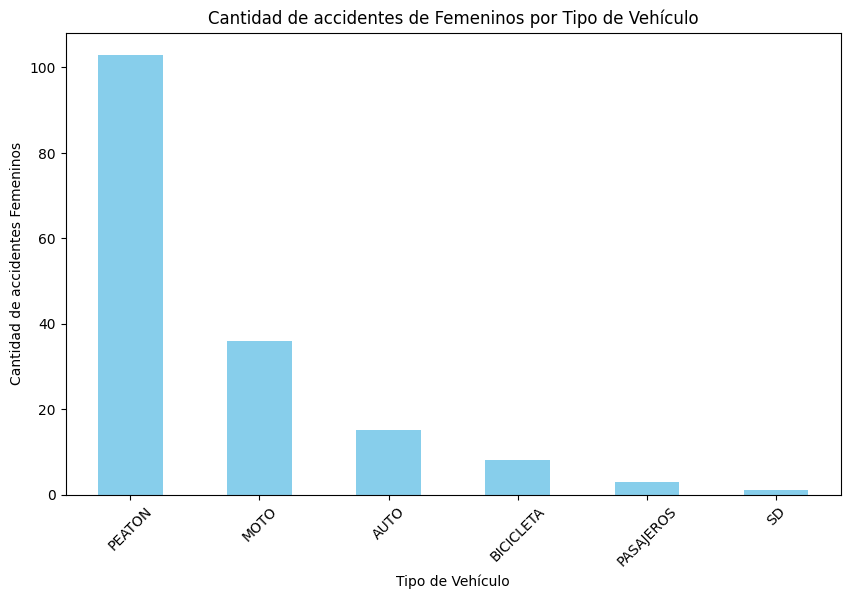

In [55]:
# Filtrar los registros con género "FEMENINO"
femenino_df = victimas[victimas['Sexo'] == 'FEMENINO']

# Contar la cantidad de registros masculinos por tipo de vehículo
conteo_femenino_por_vehiculo = femenino_df['Víctima'].value_counts()

# Crear el gráfico de barras agrupadas
plt.figure(figsize=(10, 6))  # Tamaño de la figura
conteo_femenino_por_vehiculo.plot(kind='bar', color='skyblue')  # Crear el gráfico de barras
plt.title('Cantidad de accidentes de Femeninos por Tipo de Vehículo')  # Título del gráfico
plt.xlabel('Tipo de Vehículo')  # Etiqueta del eje x
plt.ylabel('Cantidad de accidentes Femeninos')  # Etiqueta del eje y
plt.xticks(rotation=45)  # Rotación de las etiquetas del eje x
plt.show()  # Mostrar el gráfico

Podemos decir que mas de la mitad de las victimas femeninas eran peatones.
Ahora analizo los datos SD en columna SEXO por tipo de vehiculo.

In [56]:
# Contar cuántas veces aparece "SD" en la columna "SEXO" y diferenciar por "VICTIMA"
conteo_sd_por_victima = victimas[victimas['Sexo'] == 'SD']['Víctima'].value_counts()

print(conteo_sd_por_victima)

MOTO      3
SD        2
PEATON    1
Name: Víctima, dtype: int64


In [57]:
# Filtrar los registros que tienen "SD" en ambas columnas
registros_sd = victimas[(victimas['Sexo'] == 'SD') & (victimas['Víctima'] == 'SD')]

# Mostrar el nuevo DataFrame
registros_sd

,Id,Fecha,Año,Mes,Día,Rol,Víctima,Sexo,Edad,Fecha fallecimiento
36,2016-0049,2016-04-17,2016,4,17,SD,SD,SD,NaN,SD
141,2016-0174,2016-12-27,2016,12,27,SD,SD,SD,NaN,SD


Esto muestra que hay 2 de las 717 victimas sobre las cuales no se tienen datos, solo la fecha del hecho. Tendria que revisarse qué sucedió.

<Figure size 1000x600 with 0 Axes>

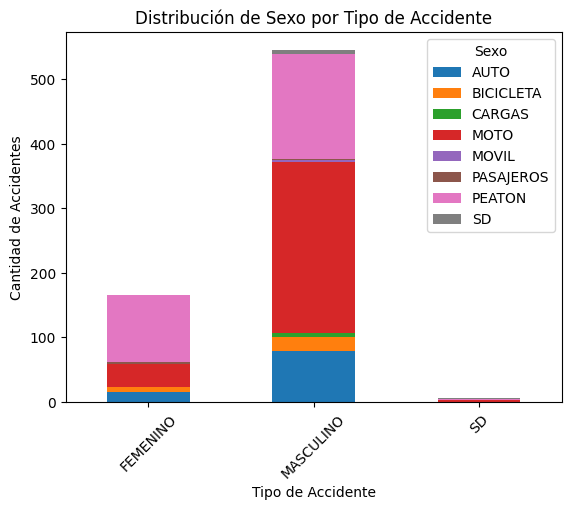

In [58]:
conteo_sexo_victima = victimas.groupby(['Sexo', 'Víctima']).size().unstack(fill_value=0)

# Crear el gráfico de pirámide
plt.figure(figsize=(10, 6))  # Tamaño de la figura
conteo_sexo_victima.plot(kind='bar', stacked=True)  # Crear el gráfico de barras apiladas
plt.title('Distribución de Sexo por Tipo de Accidente')  # Título del gráfico
plt.xlabel('Tipo de Accidente')  # Etiqueta del eje x
plt.ylabel('Cantidad de Accidentes')  # Etiqueta del eje y
plt.xticks(rotation=45)  # Rotación de las etiquetas del eje x
plt.legend(title='Sexo', loc='upper right')  # Agregar leyenda
plt.show()  # Mostrar el gráfico

Vemos que el sexo de los peatones no es una variable relevante para el analisis ya que presentan la misma cantidad aproximadamente. Sin embargo, vemos una gran diferencia entre los sexos de los motociclistas. Se lo podemos adjudicar a que la gran población de motociclistas son masculinos. 

In [59]:
hechos = pd.read_excel(r'C:\Users\Usuario\Desktop\HENRY\PI2\homicidios.xlsx',sheet_name = 'HECHOS')
hechos

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,NaN,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,2034.0,NaN,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,...,NaN,"VILLEGAS, CONRADO, GRAL.","LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-SD,MOTO,SD
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,...,NaN,"SAENZ PE?A, LUIS, PRES.","SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
691,2021-0093,1,2021-12-13,2021,12,13,17:10:00,17,AV. RIESTRA Y MOM,AVENIDA,...,NaN,MOM,RIESTRA AV. y MOM,7,Point (102728.60090138 98186.24929177),-58.43353773,-34.64561636,MOTO-AUTO,MOTO,AUTO
692,2021-0094,1,2021-12-20,2021,12,20,01:10:00,1,AU DELLEPIANE Y LACARRA,AUTOPISTA,...,NaN,LACARRA AV.,"DELLEPIANE, LUIS, TTE. GRAL. y LACARRA AV.",9,Point (99624.29795829 97569.69801131),-58.46739825,-34.65117757,MOTO-AUTO,MOTO,AUTO
693,2021-0095,1,2021-12-30,2021,12,30,00:43:00,0,AV. GAONA Y TERRADA,AVENIDA,...,NaN,TERRADA,GAONA AV. y TERRADA,11,Point (99116.45492358 101045.23284826),-58.47293407,-34.61984745,MOTO-CARGAS,MOTO,CARGAS
694,2021-0096,1,2021-12-15,2021,12,15,10:30:00,10,AV. EVA PERON 4071,AVENIDA,...,4071.0,NaN,"PERON, EVA AV. 4071",9,Point (99324.54463985 97676.26932409),-58.47066794,-34.65021673,AUTO-CARGAS,AUTO,CARGAS


In [60]:
#visualizo las columnas para luego determinar cuales voy a vincular en el analisis
hechos.columns

Index(['ID', 'N_VICTIMAS', 'FECHA', 'AAAA', 'MM', 'DD', 'HORA', 'HH',
       'LUGAR_DEL_HECHO', 'TIPO_DE_CALLE', 'Calle', 'Altura', 'Cruce',
       'Dirección Normalizada', 'COMUNA', 'XY (CABA)', 'pos x', 'pos y',
       'PARTICIPANTES', 'VICTIMA', 'ACUSADO'],
      dtype='object')

In [61]:
hechos.shape

(696, 21)

In [62]:
hechos.duplicated().sum()

0

In [63]:
hechos.isna().sum()

ID                         0
N_VICTIMAS                 0
FECHA                      0
AAAA                       0
MM                         0
DD                         0
HORA                       0
HH                         0
LUGAR_DEL_HECHO            0
TIPO_DE_CALLE              0
Calle                      1
Altura                   567
Cruce                    171
Dirección Normalizada      8
COMUNA                     0
XY (CABA)                  0
pos x                      0
pos y                      0
PARTICIPANTES              0
VICTIMA                    0
ACUSADO                    0
dtype: int64

In [64]:
#La mayoría de los registros no presenta "Altura". Se elimina la columna por la gran falta de datos
hechos = hechos.drop('Altura', axis=1)
hechos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     696 non-null    object        
 1   N_VICTIMAS             696 non-null    int64         
 2   FECHA                  696 non-null    datetime64[ns]
 3   AAAA                   696 non-null    int64         
 4   MM                     696 non-null    int64         
 5   DD                     696 non-null    int64         
 6   HORA                   696 non-null    object        
 7   HH                     696 non-null    object        
 8   LUGAR_DEL_HECHO        696 non-null    object        
 9   TIPO_DE_CALLE          696 non-null    object        
 10  Calle                  695 non-null    object        
 11  Cruce                  525 non-null    object        
 12  Dirección Normalizada  688 non-null    object        
 13  COMUN

In [65]:
hechos.describe()

,N_VICTIMAS,AAAA,MM,DD,COMUNA
count,696.000000,696.000000,696.000000,696.000000,696.000000
mean,1.030172,2018.188218,6.692529,15.936782,7.425287
std,0.179393,1.683754,3.571309,8.639646,4.387050
min,1.000000,2016.000000,1.000000,1.000000,0.000000
25%,1.000000,2017.000000,4.000000,9.000000,4.000000
50%,1.000000,2018.000000,7.000000,16.000000,8.000000
75%,1.000000,2020.000000,10.000000,23.000000,11.000000
max,3.000000,2021.000000,12.000000,31.000000,15.000000


In [66]:
#agregamos un columna que indique el día de la semana que corresponde a cada fecha, 
#para poder analizar si el dia de la semana es una variable que influye en los hechos
hechos['DIA_SEMANA'] = hechos['FECHA'].dt.day_name() 
hechos

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO,DIA_SEMANA
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO,Friday
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS,Saturday
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,NaN,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO,Sunday
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,...,"VILLEGAS, CONRADO, GRAL.","LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-SD,MOTO,SD,Sunday
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,...,"SAENZ PE?A, LUIS, PRES.","SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
691,2021-0093,1,2021-12-13,2021,12,13,17:10:00,17,AV. RIESTRA Y MOM,AVENIDA,...,MOM,RIESTRA AV. y MOM,7,Point (102728.60090138 98186.24929177),-58.43353773,-34.64561636,MOTO-AUTO,MOTO,AUTO,Monday
692,2021-0094,1,2021-12-20,2021,12,20,01:10:00,1,AU DELLEPIANE Y LACARRA,AUTOPISTA,...,LACARRA AV.,"DELLEPIANE, LUIS, TTE. GRAL. y LACARRA AV.",9,Point (99624.29795829 97569.69801131),-58.46739825,-34.65117757,MOTO-AUTO,MOTO,AUTO,Monday
693,2021-0095,1,2021-12-30,2021,12,30,00:43:00,0,AV. GAONA Y TERRADA,AVENIDA,...,TERRADA,GAONA AV. y TERRADA,11,Point (99116.45492358 101045.23284826),-58.47293407,-34.61984745,MOTO-CARGAS,MOTO,CARGAS,Thursday
694,2021-0096,1,2021-12-15,2021,12,15,10:30:00,10,AV. EVA PERON 4071,AVENIDA,...,NaN,"PERON, EVA AV. 4071",9,Point (99324.54463985 97676.26932409),-58.47066794,-34.65021673,AUTO-CARGAS,AUTO,CARGAS,Wednesday


In [67]:
#Pasamos los días del ingles al español
dic={  'Friday':'Viernes',
       'Saturday': 'Sabado',
       'Sunday': 'Domingo',  
       'Thursday': 'Jueves',
        'Monday': 'Lunes',
        'Wednesday': 'Miercoles',
       'Tuesday': 'Martes'}
hechos['DIA_SEMANA'] =hechos['DIA_SEMANA'].replace(dic)

In [68]:
hechos.columns

Index(['ID', 'N_VICTIMAS', 'FECHA', 'AAAA', 'MM', 'DD', 'HORA', 'HH',
       'LUGAR_DEL_HECHO', 'TIPO_DE_CALLE', 'Calle', 'Cruce',
       'Dirección Normalizada', 'COMUNA', 'XY (CABA)', 'pos x', 'pos y',
       'PARTICIPANTES', 'VICTIMA', 'ACUSADO', 'DIA_SEMANA'],
      dtype='object')

In [69]:
hechos['VICTIMA'].unique()

array(['MOTO', 'AUTO', 'PEATON', 'SD', 'CARGAS', 'BICICLETA', 'PASAJEROS',
       'MOVIL', 'OBJETO FIJO', 'PEATON_MOTO'], dtype=object)

Se denota que OBJETO FIJO Y PEATON_MOTO no estan en el diccionario de datos. Por lo tanto se decide cambiar esos datos y los SD por OTRO.

In [70]:
hechos['VICTIMA'] = hechos['VICTIMA'].replace({'OBJETO FIJO':'OTRO', 'PEATON_MOTO':'OTRO', 'SD':'OTRO'})


Reemplazo los faltantes de las columnas pos x, pos y y XY(CABA) por 0 para poder utilizar estas columnas sin problemas para el analisis.

In [71]:
# Se reemplazan los valores faltantes por 0
hechos['pos x'] = hechos['pos x'].replace('.', 0)
hechos['pos y'] = hechos['pos y'].replace('.', 0)
hechos['XY (CABA)'] = hechos['XY (CABA)'].replace('Point (. .)', 0)

Ahora, se decide trabajar solo con la columna HH. Por lo tanto, se elimina la columna HORA.

In [72]:
hechos.drop('HORA', axis=1, inplace=True)
#y miro HH
hechos['HH'].apply(type).value_counts()

<class 'int'>    695
<class 'str'>      1
Name: HH, dtype: int64

In [73]:
hechos[hechos['HH'].apply(type) == str]

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,Calle,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO,DIA_SEMANA
518,2019-0103,1,2019-12-18,2019,12,18,SD,"PAZ, GRAL. AV. Y GRIVEO",GRAL PAZ,"PAZ, GRAL. AV.",GRIVEO,"PAZ, GRAL. AV. y GRIVEO",11,Point (94643.11254058 103831.57115061),-58.52169422,-34.59471640,MOTO-MOTO,MOTO,MOTO,Miercoles


In [74]:
moda_hh = hechos['HH'].mode().iloc[0]
# Reemplaza las filas donde 'HH' es de tipo str con la moda calculada
hechos.loc[hechos['HH'].apply(type) == str, 'HH'] = moda_hh


In [75]:
hechos[hechos['ID'] == '2019-0103']

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,Calle,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO,DIA_SEMANA
518,2019-0103,1,2019-12-18,2019,12,18,7,"PAZ, GRAL. AV. Y GRIVEO",GRAL PAZ,"PAZ, GRAL. AV.",GRIVEO,"PAZ, GRAL. AV. y GRIVEO",11,Point (94643.11254058 103831.57115061),-58.52169422,-34.59471640,MOTO-MOTO,MOTO,MOTO,Miercoles


A continuación, se vinculan algunas de las variables:

In [76]:
hechos['COMUNA'].unique()

array([ 8,  9,  1, 11, 15,  4,  7, 12,  3, 13, 14, 10,  6,  2,  5,  0],
      dtype=int64)

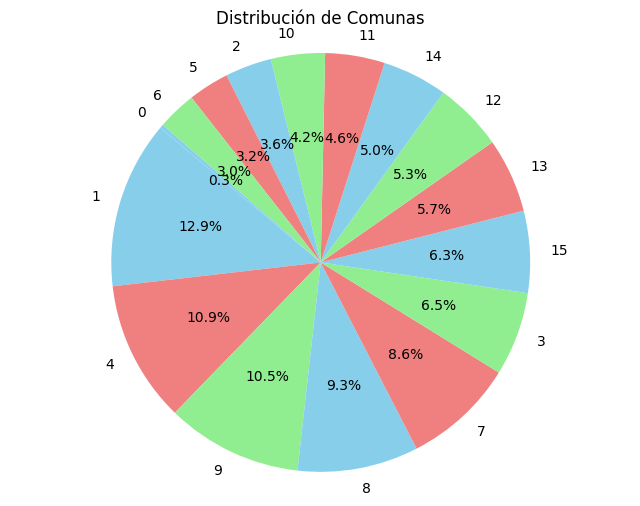

In [77]:
hechos['COMUNA'].sort_index()
recuento_comunas = hechos['COMUNA'].value_counts()
# Crear el gráfico de barras
plt.figure(figsize=(8, 6))  # Opcional: ajusta el tamaño del gráfico
plt.pie(recuento_comunas, labels=recuento_comunas.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightcoral', 'lightgreen'])
plt.title('Distribución de Comunas')
plt.axis('equal')  # Proporciona un aspecto de círculo perfecto
plt.show()

De esta forma, vemos que la mayor cantidad de siniestros ocurrieron en las comunas 1,4,9,8 y 7.

A continuación, analizamos la cantidad de accidentes por año.

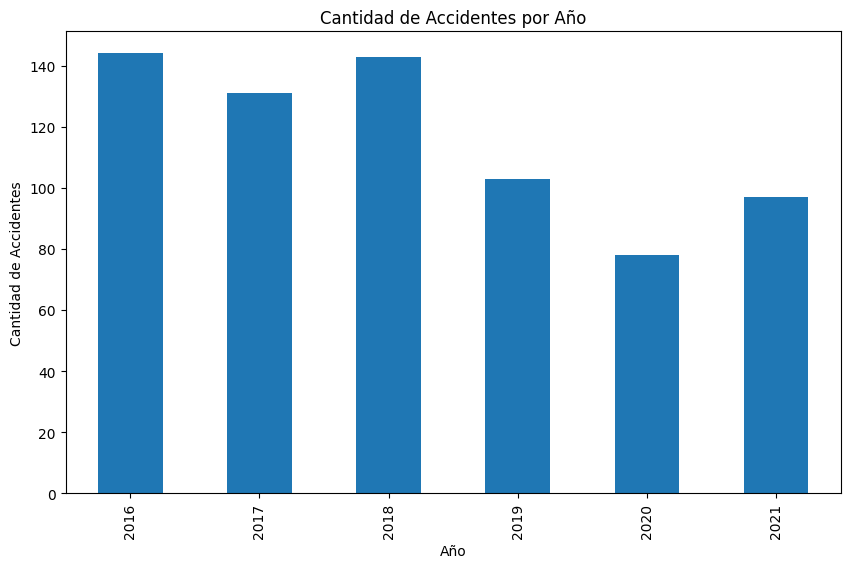

In [78]:
# Contar la cantidad de accidentes por año
accidentes_por_año = hechos['AAAA'].value_counts().sort_index()

# Crear el gráfico de barras
accidentes_por_año.plot(kind='bar', figsize=(10, 6))

# Personalizar el gráfico
plt.title('Cantidad de Accidentes por Año')
plt.xlabel('Año')
plt.ylabel('Cantidad de Accidentes')

# Mostrar el gráfico
plt.show()

Vemos que en 2020 se redujo bastante la cantidad de accidentes. Se lo podemos adjudicar a la situación de pandemia, en la cual hubo menor tránsito de automoviles por el aislamiento.

In [79]:
comuna1 = hechos[hechos['COMUNA'] == 1]
comuna1

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,Calle,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO,DIA_SEMANA
2,2016-0003,1,2016-01-03,2016,1,3,7,AV ENTRE RIOS 2034,AVENIDA,ENTRE RIOS AV.,NaN,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO,Domingo
4,2016-0005,1,2016-01-21,2016,1,21,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,SAN JUAN AV.,"SAENZ PE?A, LUIS, PRES.","SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS,Jueves
8,2016-0012,1,2016-02-08,2016,2,8,1,AV BELGRANO Y BERNARDO DE IRIGOYEN,AVENIDA,BELGRANO AV.,"IRIGOYEN, BERNARDO DE","BELGRANO AV. e IRIGOYEN, BERNARDO DE",1,Point (107595.35084333 101797.50052813),-58.38048577,-34.61303893,MOTO-CARGAS,MOTO,CARGAS,Lunes
9,2016-0013,1,2016-02-10,2016,2,10,11,AV ENTRE RIOS 1366,AVENIDA,ENTRE RIOS AV.,NaN,ENTRE RIOS AV. 1366,1,Point (106616.41069662 100496.44662323),-58.39114932,-34.62477387,PEATON-AUTO,PEATON,AUTO,Miercoles
14,2016-0020,1,2016-02-17,2016,2,17,16,SUIPACHA 156,CALLE,SUIPACHA,NaN,SUIPACHA 156,1,Point (107684.31807562 102519.17333314),-58.37952223,-34.60653282,PEATON-AUTO,PEATON,AUTO,Miercoles
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
673,2021-0075,1,2021-09-21,2021,9,21,14,SALTA Y BRASIL,CALLE,SALTA,BRASIL,SALTA y BRASIL,1,Point (107380.60401316 100153.47427104),-58.38281301,-34.62786038,PEATON-CARGAS,PEATON,CARGAS,Martes
678,2021-0080,1,2021-10-28,2021,10,28,16,ARENALES Y 9 DE JULIO AV.,AVENIDA,ARENALES,9 DE JULIO AV.,ARENALES y 9 DE JULIO AV.,1,Point (107387.05825032 103876.26437289),-58.38277479,-34.59430160,MOTO-AUTO,MOTO,AUTO,Jueves
685,2021-0087,1,2021-11-27,2021,11,27,11,ESMERALDA 1359,CALLE,ESMERALDA,NaN,ESMERALDA 1359,1,Point (107829.16426745 104166.84427133),-58.37795815,-34.59167894,PEATON-BICICLETA,PEATON,BICICLETA,Sabado
688,2021-0090,1,2021-12-10,2021,12,10,11,AV. 9 DE JULIO Y LAVALLE,AVENIDA,9 DE JULIO AV.,LAVALLE,9 DE JULIO AV. y LAVALLE,1,Point (107467.87595573 102960.02837514),-58.38188582,-34.60256036,PEATON-PASAJEROS,PEATON,PASAJEROS,Viernes


In [80]:
conteo_por_año = comuna1['AAAA'].value_counts().reset_index()
conteo_por_año

,index,AAAA
0,2016,22
1,2018,19
2,2017,18
3,2019,12
4,2020,10
5,2021,9


Pasamos a mayuscula la primer letra de los nombres de todos los campos y se cambian las siglas por los nombres para una mejor lectura.

In [81]:
# Se coloca la primera en mayúscula
hechos.columns = [x.capitalize() for x in hechos.columns]
# Se reemplazan los guiones por espacios
hechos.columns = hechos.columns.str.replace('_', ' ')
# Se renombran algunas columnas
hechos = hechos.rename(columns={'N victimas': 'Cantidad víctimas',
                                                      'Aaaa':'Año',
                                                      'Mm':'Mes',
                                                      'Dd':'Día',
                                                      'Hh':'Hora entera',
                                                      'Xy (caba)':'XY (CABA)',
                                                      'Victima': 'Víctima'})

Guardo cada df como csv para luego ingestarlos en PowerBI

In [82]:
victimasBI= 'victimasBI.csv'
victimas.to_csv(victimasBI, index=False, encoding='utf-8')

In [83]:
hechosBI= 'hechosBI.csv'
hechos.to_csv(hechosBI, index=False, encoding='utf-8')